In [1]:
## UROP exploration
# Study on HITLAirconEnvironment with MDP (padded population with met and clo)
# Converged!
# Changed pop_mu and pop_sigma which required changing the MAX_POP_SIZE padding but still converged
# Changed various hyperparameters and found that wrong parameters might result in non-convergence

In [4]:
import time
from models.BaseAgent import BaseAgent
import gymnasium as gym
import torch
import numpy as np
from gym_examples.utils.population import PopulationSimulation
from models.HITLDQNAgent import HITLDQNAgent
# Initialise training environment


def train(agent:BaseAgent, env:gym.Env, episodes: int, device, is_exploring:bool):
    """Train agent using gym environment while being offline"""

    rewards = []

    agent.reset_replay_memory() # Same train function has the same episodic memory
    agent.set_exploring(True)

    for i_episode in range(episodes):
        print(f'######------------------------------------EPISODE {i_episode}------------------------------------######')
        observation, info = env.reset()
        state = torch.tensor(observation, dtype=torch.float32, device=device).unsqueeze(0)
        ep_rewards = 0
        is_done = False

        i = 0
        while not is_done:
            start = time.time()
            start_a = time.time()
            action = agent.select_action(state)
            end_a = time.time()
            # print(f'Action selection duration:{end_a-start_a}')
            observation, reward, terminated, truncated, info = env.step(action.item())
            reward = torch.tensor([np.float32(reward)], device=device)
            ep_rewards += reward
            is_done = terminated or truncated
            next_state = None if terminated else torch.tensor(observation, dtype=torch.float32, device=device).unsqueeze(0)

            agent.memorize(state, action, next_state, reward)
            state = next_state
            start_o = time.time()
            agent.optimize_model()
            end_o = time.time()
            # print(f'Optimization selection duration:{end_o-start_o}')

            end = time.time()
            # print(f'Iteration duration:{end-start}')

        rewards.append(ep_rewards.item())
                


    # Return agent, and 3 list of episodic int rewards (len(rewards) = episodes)
    return agent, rewards

device = torch.device(
    "cuda" if torch.cuda.is_available() else
    "mps" if torch.backends.mps.is_available() else
    "cpu"
)
population = PopulationSimulation(2.9, 1.05, 0.5, 0.25, 200, 80)
# w_energy, w_usercomfort is from generated from a comfort score of range (-40 - 0) and power score (-1000 - -300) 100:1
env = gym.make("HITLAirconEnvironment-v0", population_simulation=population, is_render=False, check_optimal=False ,w_usercomfort=1000)
print("######------------------------------------Resetting environment...------------------------------------######")

state, info = env.reset()
n_observations = len(state)
n_actions = env.action_space.n

######------------------------------------Resetting environment...------------------------------------######


/Users/waishunlee/Documents/UROP/hitl_hvac/.venv/lib/python3.10/site-packages/gymnasium/utils/passive_env_checker.py:32: UserWarning: WARN: A Box observation space maximum and minimum values are equal. Actual equal coordinates: [(603, 0)]
  logger.warn(
/Users/waishunlee/Documents/UROP/hitl_hvac/.venv/lib/python3.10/site-packages/gymnasium/utils/passive_env_checker.py:135: UserWarning: WARN: The obs returned by the `reset()` method was expecting numpy array dtype to be float32, actual type: float64
  logger.warn(
/Users/waishunlee/Documents/UROP/hitl_hvac/.venv/lib/python3.10/site-packages/gymnasium/utils/passive_env_checker.py:159: UserWarning: WARN: The obs returned by the `reset()` method is not within the observation space.
  logger.warn(f"{pre} is not within the observation space.")


In [5]:
agent = HITLDQNAgent(n_observations, n_actions, device, 
                     memory_size=10000, 
                     batch_size=64, 
                     gamma=0.99, 
                     eps_start=0.9, 
                     eps_end=0.05, 
                     eps_decay=1000, 
                     tau=0.005, 
                     lr=1e-4)


KeyError: 'gym_examples'

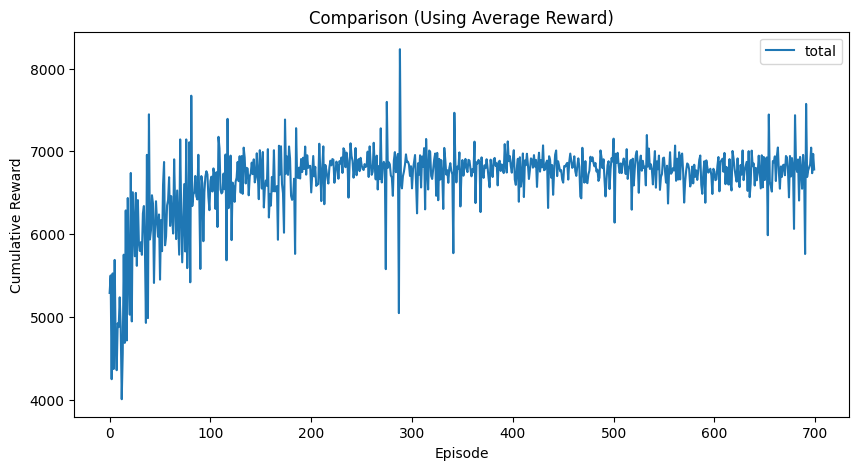

In [4]:
NUM_EPISODES = 700 if torch.cuda.is_available() or torch.backends.mps.is_available() else 50 # Number of days (each episode is a day)

print("######------------------------------------Starting training...------------------------------------######")
agent, rewards = train(agent, env, NUM_EPISODES, device, True)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(rewards, label='total')
plt.xlabel('Episode')
plt.ylabel('Cumulative Reward')
plt.title('Comparison (Using Average Reward)')
plt.legend()

plt.ioff()
plt.show()

######------------------------------------Starting training...------------------------------------######
######------------------------------------EPISODE 0------------------------------------######
######------------------------------------EPISODE 1------------------------------------######
######------------------------------------EPISODE 2------------------------------------######
######------------------------------------EPISODE 3------------------------------------######
######------------------------------------EPISODE 4------------------------------------######
######------------------------------------EPISODE 5------------------------------------######
######------------------------------------EPISODE 6------------------------------------######
######------------------------------------EPISODE 7------------------------------------######
######------------------------------------EPISODE 8------------------------------------######
######------------------------------------EPISODE

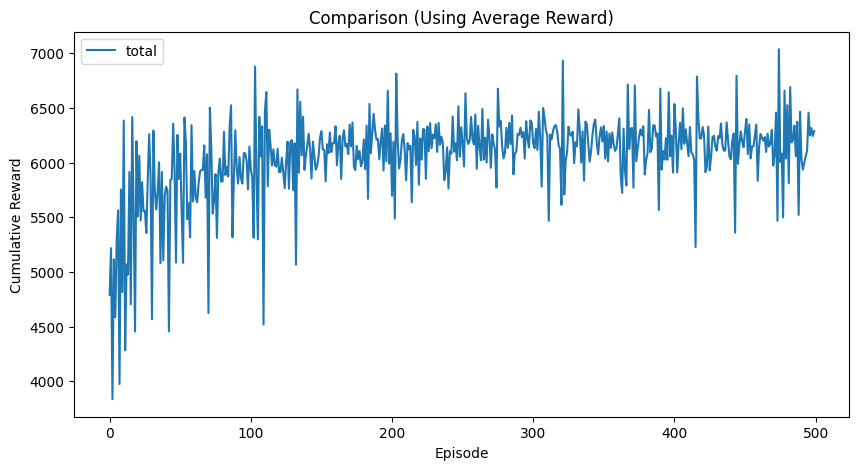

In [7]:
agent = HITLDQNAgent(n_observations, n_actions, device, 
                     memory_size=10000, 
                     batch_size=64, 
                     gamma=0.90, 
                     eps_start=0.9, 
                     eps_end=0.05, 
                     eps_decay=1000, 
                     tau=0.005, 
                     lr=1e-4)

NUM_EPISODES = 500 if torch.cuda.is_available() or torch.backends.mps.is_available() else 50 # Number of days (each episode is a day)

print("######------------------------------------Starting training...------------------------------------######")
agent, rewards = train(agent, env, NUM_EPISODES, device, True)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(rewards, label='total')
plt.xlabel('Episode')
plt.ylabel('Cumulative Reward')
plt.title('Comparison (Using Average Reward)')
plt.legend()

plt.ioff()
plt.show()

######------------------------------------Starting training...------------------------------------######
######------------------------------------EPISODE 0------------------------------------######
######------------------------------------EPISODE 1------------------------------------######
######------------------------------------EPISODE 2------------------------------------######
######------------------------------------EPISODE 3------------------------------------######
######------------------------------------EPISODE 4------------------------------------######
######------------------------------------EPISODE 5------------------------------------######
######------------------------------------EPISODE 6------------------------------------######
######------------------------------------EPISODE 7------------------------------------######
######------------------------------------EPISODE 8------------------------------------######
######------------------------------------EPISODE

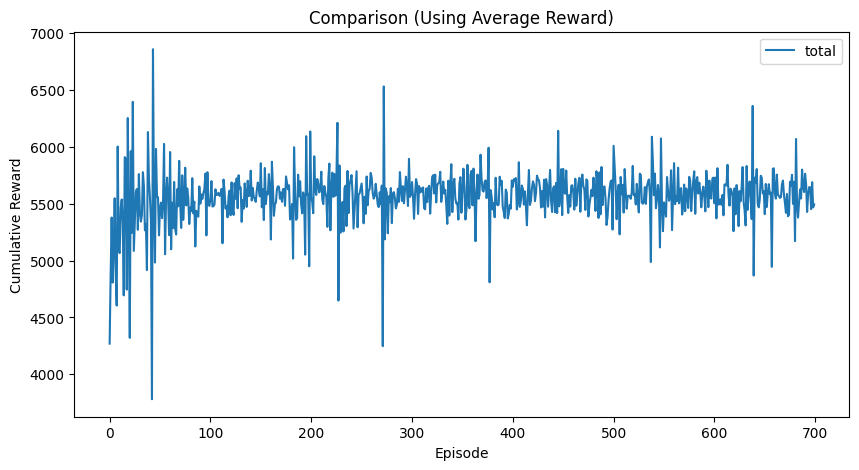

In [8]:
agent = HITLDQNAgent(n_observations, n_actions, device, 
                     memory_size=10000, 
                     batch_size=64, 
                     gamma=0.99, 
                     eps_start=0.9, 
                     eps_end=0.05, 
                     eps_decay=500, 
                     tau=0.005, 
                     lr=1e-4)

NUM_EPISODES = 700 if torch.cuda.is_available() or torch.backends.mps.is_available() else 50 # Number of days (each episode is a day)

print("######------------------------------------Starting training...------------------------------------######")
agent, rewards = train(agent, env, NUM_EPISODES, device, True)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(rewards, label='total')
plt.xlabel('Episode')
plt.ylabel('Cumulative Reward')
plt.title('Comparison (Using Average Reward)')
plt.legend()

plt.ioff()
plt.show()

######------------------------------------Starting training...------------------------------------######
######------------------------------------EPISODE 0------------------------------------######
######------------------------------------EPISODE 1------------------------------------######
######------------------------------------EPISODE 2------------------------------------######
######------------------------------------EPISODE 3------------------------------------######
######------------------------------------EPISODE 4------------------------------------######
######------------------------------------EPISODE 5------------------------------------######
######------------------------------------EPISODE 6------------------------------------######
######------------------------------------EPISODE 7------------------------------------######
######------------------------------------EPISODE 8------------------------------------######
######------------------------------------EPISODE

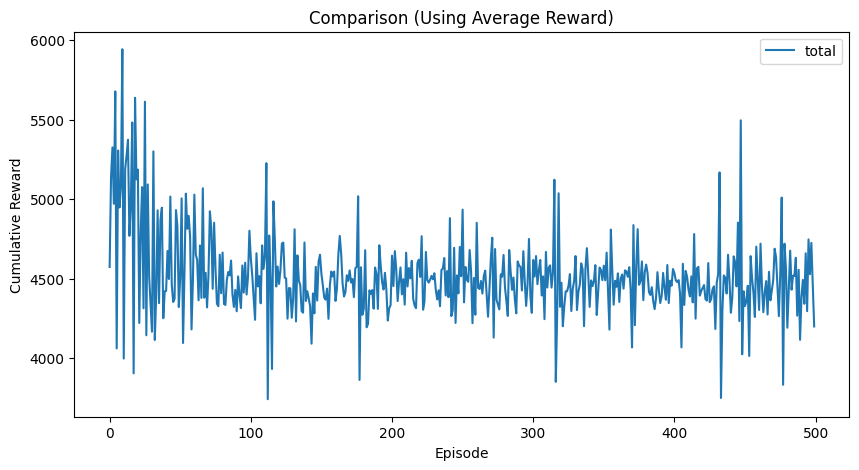

In [9]:
agent = HITLDQNAgent(n_observations, n_actions, device, 
                     memory_size=10000, 
                     batch_size=16, 
                     gamma=0.99, 
                     eps_start=0.9, 
                     eps_end=0.05, 
                     eps_decay=1000, 
                     tau=0.005, 
                     lr=1e-4)

NUM_EPISODES = 500 if torch.cuda.is_available() or torch.backends.mps.is_available() else 50 # Number of days (each episode is a day)

print("######------------------------------------Starting training...------------------------------------######")
agent, rewards = train(agent, env, NUM_EPISODES, device, True)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(rewards, label='total')
plt.xlabel('Episode')
plt.ylabel('Cumulative Reward')
plt.title('Comparison (Using Average Reward)')
plt.legend()

plt.ioff()
plt.show()

######------------------------------------Starting training...------------------------------------######
######------------------------------------EPISODE 0------------------------------------######
######------------------------------------EPISODE 1------------------------------------######
######------------------------------------EPISODE 2------------------------------------######
######------------------------------------EPISODE 3------------------------------------######
######------------------------------------EPISODE 4------------------------------------######
######------------------------------------EPISODE 5------------------------------------######
######------------------------------------EPISODE 6------------------------------------######
######------------------------------------EPISODE 7------------------------------------######
######------------------------------------EPISODE 8------------------------------------######
######------------------------------------EPISODE

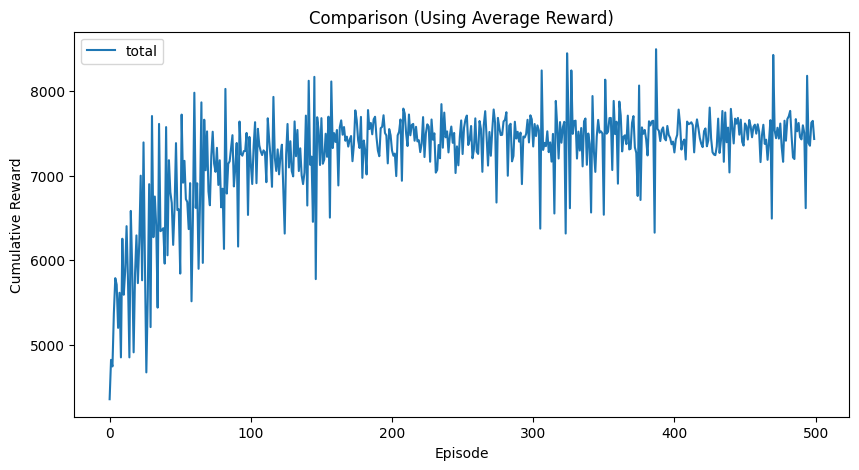

In [10]:
agent = HITLDQNAgent(n_observations, n_actions, device, 
                     memory_size=10000, 
                     batch_size=64, 
                     gamma=0.99, 
                     eps_start=0.9, 
                     eps_end=0.05, 
                     eps_decay=1000, 
                     tau=0.005, 
                     lr=1e-2)

NUM_EPISODES = 500 if torch.cuda.is_available() or torch.backends.mps.is_available() else 50 # Number of days (each episode is a day)

print("######------------------------------------Starting training...------------------------------------######")
agent, rewards = train(agent, env, NUM_EPISODES, device, True)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(rewards, label='total')
plt.xlabel('Episode')
plt.ylabel('Cumulative Reward')
plt.title('Comparison (Using Average Reward)')
plt.legend()

plt.ioff()
plt.show()

######------------------------------------Starting training...------------------------------------######
######------------------------------------EPISODE 0------------------------------------######
######------------------------------------EPISODE 1------------------------------------######
######------------------------------------EPISODE 2------------------------------------######
######------------------------------------EPISODE 3------------------------------------######
######------------------------------------EPISODE 4------------------------------------######
######------------------------------------EPISODE 5------------------------------------######
######------------------------------------EPISODE 6------------------------------------######
######------------------------------------EPISODE 7------------------------------------######
######------------------------------------EPISODE 8------------------------------------######
######------------------------------------EPISODE

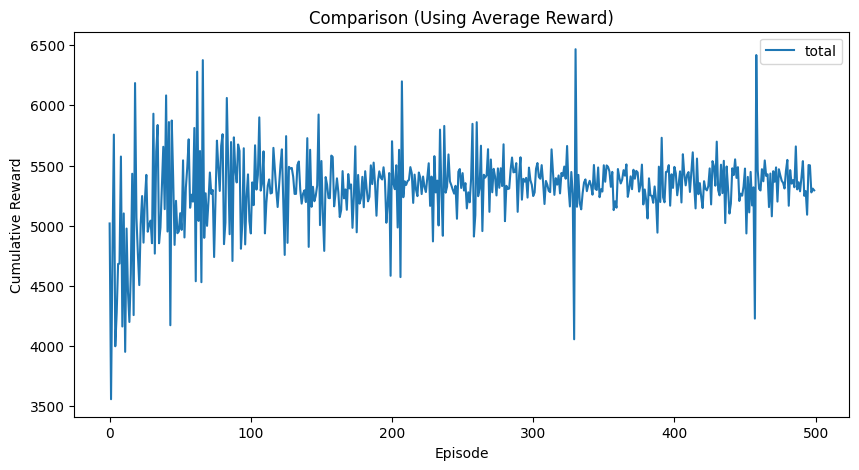

In [11]:
agent = HITLDQNAgent(n_observations, n_actions, device, 
                     memory_size=10000, 
                     batch_size=16, 
                     gamma=0.99, 
                     eps_start=0.9, 
                     eps_end=0.05, 
                     eps_decay=1000, 
                     tau=0.05, 
                     lr=1e-4)

NUM_EPISODES = 500 if torch.cuda.is_available() or torch.backends.mps.is_available() else 50 # Number of days (each episode is a day)

print("######------------------------------------Starting training...------------------------------------######")
agent, rewards = train(agent, env, NUM_EPISODES, device, True)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(rewards, label='total')
plt.xlabel('Episode')
plt.ylabel('Cumulative Reward')
plt.title('Comparison (Using Average Reward)')
plt.legend()

plt.ioff()
plt.show()

######------------------------------------Starting training...------------------------------------######
######------------------------------------EPISODE 0------------------------------------######
######------------------------------------EPISODE 1------------------------------------######
######------------------------------------EPISODE 2------------------------------------######
######------------------------------------EPISODE 3------------------------------------######
######------------------------------------EPISODE 4------------------------------------######
######------------------------------------EPISODE 5------------------------------------######
######------------------------------------EPISODE 6------------------------------------######
######------------------------------------EPISODE 7------------------------------------######
######------------------------------------EPISODE 8------------------------------------######
######------------------------------------EPISODE

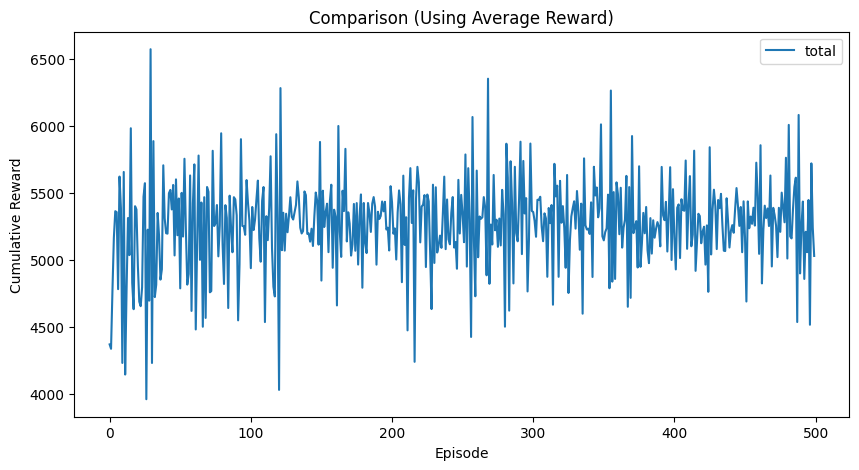

In [12]:
agent = HITLDQNAgent(n_observations, n_actions, device, 
                     memory_size=10000, 
                     batch_size=64, 
                     gamma=0.99, 
                     eps_start=0.9, 
                     eps_end=0.2, 
                     eps_decay=1000, 
                     tau=0.005, 
                     lr=1e-4)

NUM_EPISODES = 500 if torch.cuda.is_available() or torch.backends.mps.is_available() else 50 # Number of days (each episode is a day)

print("######------------------------------------Starting training...------------------------------------######")
agent, rewards = train(agent, env, NUM_EPISODES, device, True)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(rewards, label='total')
plt.xlabel('Episode')
plt.ylabel('Cumulative Reward')
plt.title('Comparison (Using Average Reward)')
plt.legend()

plt.ioff()
plt.show()

In [5]:
agent = HITLDQNAgent(n_observations, n_actions, device, 
                     memory_size=10000, 
                     batch_size=64, 
                     gamma=0.99, 
                     eps_start=0.9, 
                     eps_end=0.05, 
                     eps_decay=100, 
                     tau=0.005, 
                     lr=1e-1)

state, info = env.reset()
n_observations = len(state)
n_actions = env.action_space.n

NUM_EPISODES = 700 if torch.cuda.is_available() or torch.backends.mps.is_available() else 50 # Number of days (each episode is a day)

print("######------------------------------------Starting training...------------------------------------######")
agent, rewards = train(agent, env, NUM_EPISODES, device, True)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(rewards, label='total')
plt.xlabel('Episode')
plt.ylabel('Cumulative Reward')
plt.title('Comparison (Using Average Reward)')
plt.legend()

plt.ioff()
plt.show()

######------------------------------------Starting training...------------------------------------######
######------------------------------------EPISODE 0------------------------------------######


/Users/waishunlee/Documents/UROP/hitl_hvac/.venv/lib/python3.10/site-packages/gymnasium/utils/passive_env_checker.py:135: UserWarning: WARN: The obs returned by the `step()` method was expecting numpy array dtype to be float32, actual type: float64
  logger.warn(
/Users/waishunlee/Documents/UROP/hitl_hvac/.venv/lib/python3.10/site-packages/gymnasium/utils/passive_env_checker.py:159: UserWarning: WARN: The obs returned by the `step()` method is not within the observation space.
  logger.warn(f"{pre} is not within the observation space.")


######------------------------------------EPISODE 1------------------------------------######
######------------------------------------EPISODE 2------------------------------------######
######------------------------------------EPISODE 3------------------------------------######


/Users/waishunlee/Documents/UROP/hitl_hvac/models/HITLDQNAgent.py:117: UserWarning: MPS: nonzero op is supported natively starting from macOS 13.0. Falling back on CPU. This may have performance implications. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/mps/operations/Indexing.mm:334.)
  next_state_values[non_final_mask] = self.target_net(non_final_next_states).max(1).values


######------------------------------------EPISODE 4------------------------------------######
######------------------------------------EPISODE 5------------------------------------######
######------------------------------------EPISODE 6------------------------------------######
######------------------------------------EPISODE 7------------------------------------######
######------------------------------------EPISODE 8------------------------------------######
######------------------------------------EPISODE 9------------------------------------######
######------------------------------------EPISODE 10------------------------------------######
######------------------------------------EPISODE 11------------------------------------######
######------------------------------------EPISODE 12------------------------------------######
######------------------------------------EPISODE 13------------------------------------######
######------------------------------------EPISODE 14----

In [ ]:
def test(agent:BaseAgent, env:gym.Env, episodes: int, device):
    rewards = []
    reward_user_comfort = []
    reward_power = []

    agent.set_exploring(False)
    
    for i_episode in range(episodes):
        observation, info = env.reset()
        state = torch.tensor(observation, dtype=torch.float32, device=device).unsqueeze(0)
        ep_rewards = 0
        ep_comfort_rewards = 0
        ep_power_rewards = 0
        done = False

        i = 0
        while not done:
            action = agent.select_action(state)
            observation, reward, terminated, truncated, info = env.step(action.item())
            reward = torch.tensor([np.float32(reward)], device=device)
            ep_rewards += reward
            ep_comfort_rewards += info['comfort_score']
            ep_power_rewards += info['power_score']
            done = terminated or truncated
            next_state = None if terminated else torch.tensor(observation, dtype=torch.float32, device=device).unsqueeze(0)

            state = next_state

        rewards.append(ep_rewards.item())
        reward_user_comfort.append(ep_comfort_rewards)
        reward_power.append(ep_power_rewards)
    return rewards, reward_user_comfort, reward_power

In [7]:


rewards, reward_user_comfort, reward_power = train(agent, test_env, 30, device)

NameError: name 'test_env' is not defined